In [420]:
#import kdsource as kds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from surfsource import SurfaceSourceFile
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from lmfit import Model

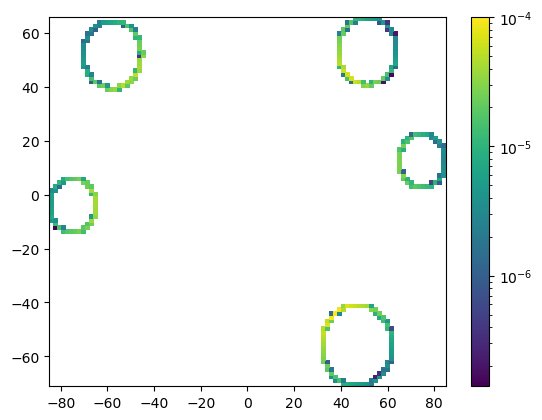

In [421]:
track = SurfaceSourceFile('tracks3.mcpl')
track.plot_distribution_2D('x','y', norm = LogNorm())

SILICIO 6 - 1

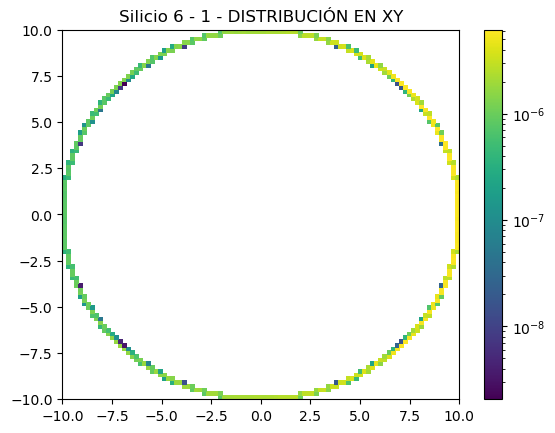

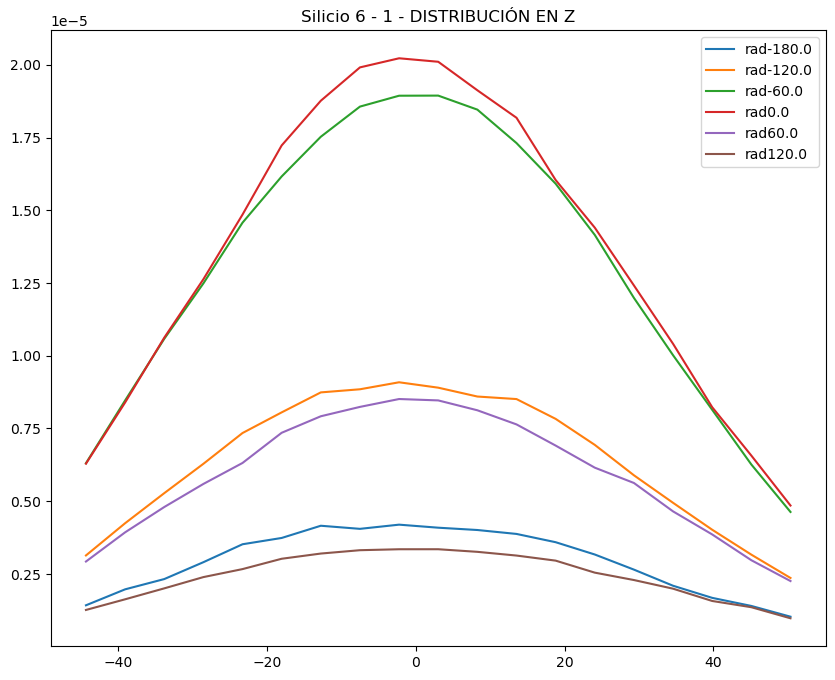

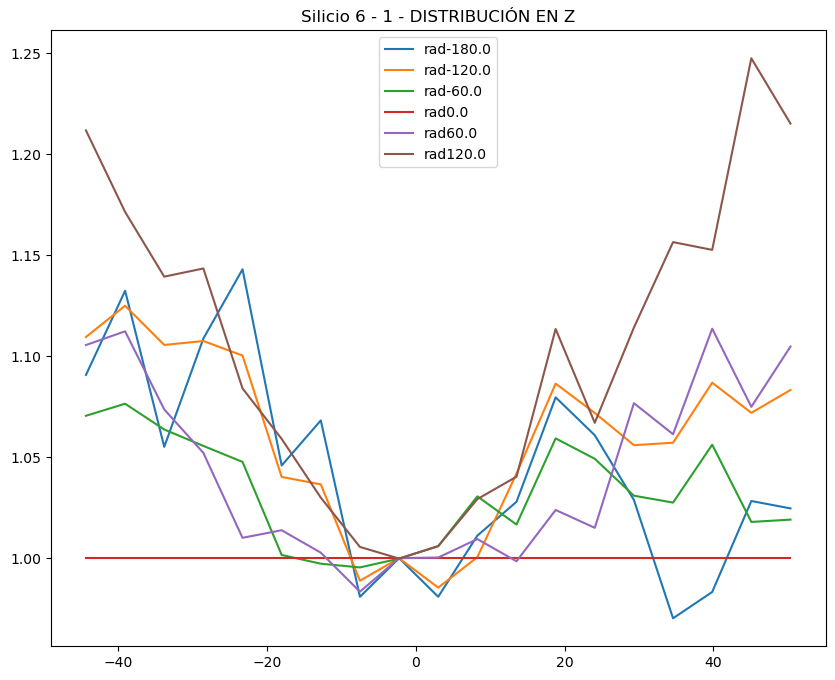

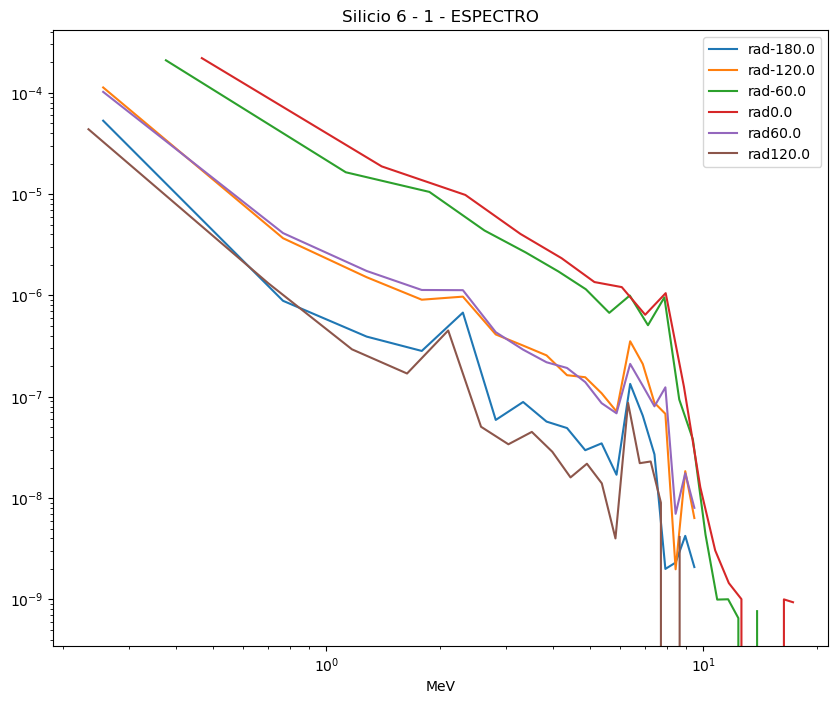

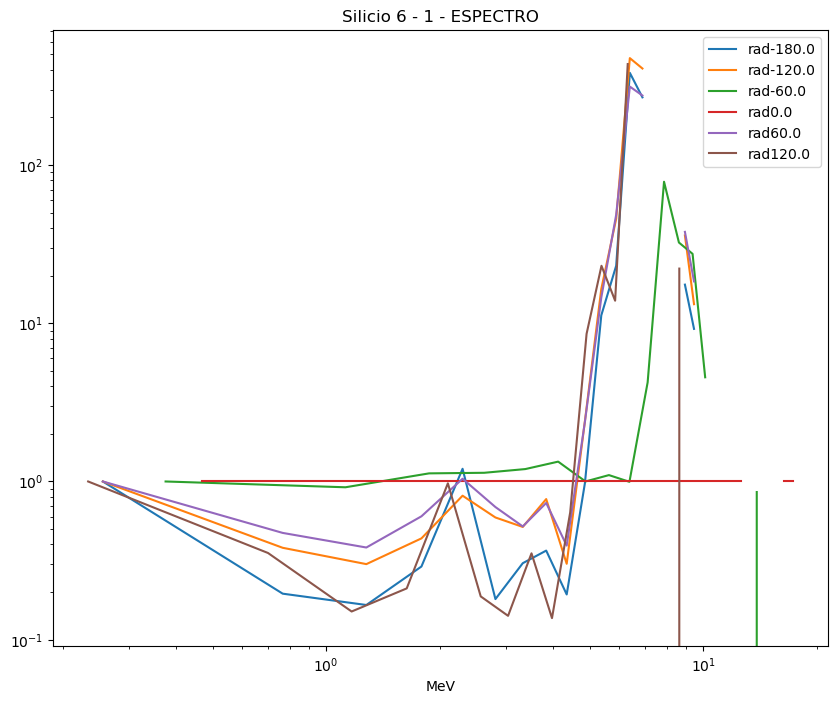

In [459]:
track_61 = SurfaceSourceFile('tracks3.mcpl', translation=[75,4,3],domain={'x':[-100,-50], 'y':[-20,20]}, set_domain_first=True)
track_61.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 1 - DISTRIBUCIÓN EN XY')
plt.show()
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8))
for i,item in enumerate(grados):
    if(i < a-1):
        track_61.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 1 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_61.plot_distribution_1D_ref('z', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 1 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_61.plot_distribution_1D('E', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 1 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_61.plot_distribution_1D_ref('E', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 1 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

0     0.000004
1     0.000005
2     0.000006
3     0.000007
4     0.000008
5     0.000009
6     0.000010
7     0.000010
8     0.000011
9     0.000011
10    0.000010
11    0.000010
12    0.000009
13    0.000008
14    0.000007
15    0.000006
16    0.000005
17    0.000004
18    0.000003
Name: mean, dtype: float64


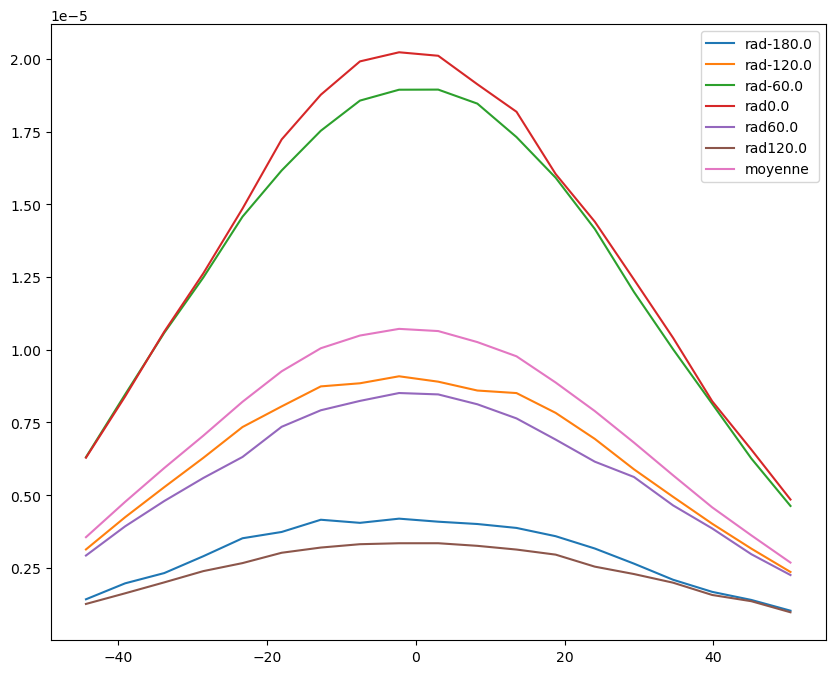

In [423]:
X=track_61.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['z']
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8))
M=track_61.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['mean']
for i,item in enumerate(grados):
    if(i < a-1):
        track_61.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
        if(i+1 < a-1):
            M+=track_61.get_distribution_1D('z', b, filters={'theta':[grados[i+1],grados[i+2]]})[0]['mean']
M=M/(a-1)
print(M)
plt.plot(X,M, label='moyenne')
#plt.plot(X,1.1e-5*np.cos((X/100)*np.pi), label='fit')
plt.legend()
plt.show()

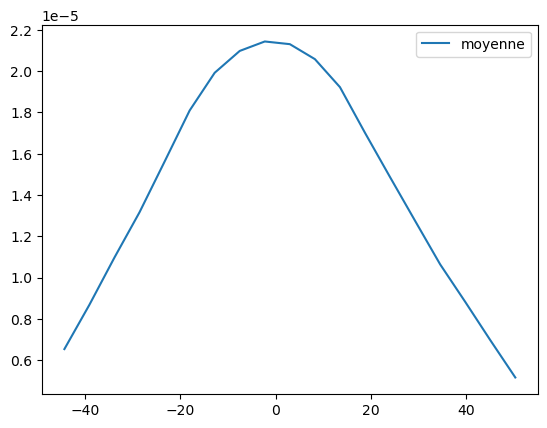

In [460]:
plt.plot(X,M, label='moyenne')
#plt.plot(X,1.1e-5*np.cos((X/100)*np.pi), label='fit')
plt.legend()
plt.show()


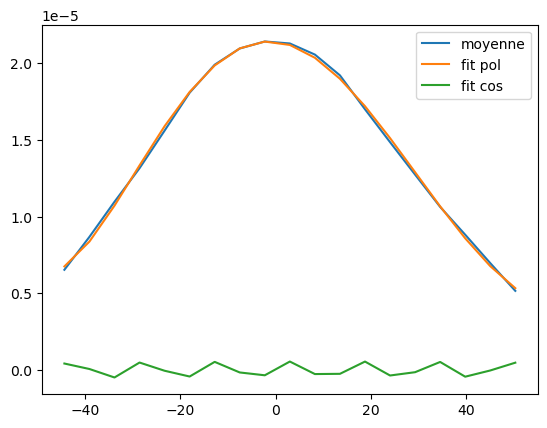

In [466]:
# Définition  des fonction
def polynomial_func(x, *coefficients):
    return np.polyval(coefficients, x)

def cosine_func(x, A,B):
    return A*np.cos((x/B)*np.pi)

# Ajustement de la courbe aux données
degree = 5  # Degré du polynôme
coeff_init = np.zeros(degree + 1)  # parametres 
params_pol, _ = curve_fit(polynomial_func, X, M, p0=coeff_init)
params_cos, _ = curve_fit(cosine_func, X, M)

# Tracé des données et du fit
plt.plot(X, M, label='moyenne')
plt.plot(X, polynomial_func(X, *params_pol), label='fit pol')
plt.plot(X, cosine_func(X, *params_cos), label='fit cos')

plt.legend()
plt.show()

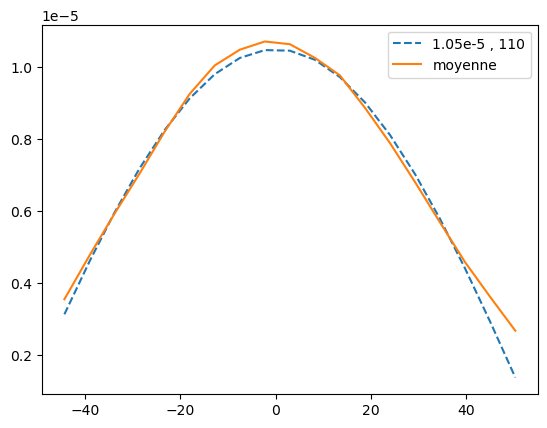

In [426]:
plt.plot(X, cosine_func(X,1.05e-5, 110 ), "--", label='1.05e-5 , 110')
plt.plot(X, M, label='moyenne')
plt.legend()
plt.show()

[[Model]]
    Model(cosine_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 19
    # variables        = 2
    chi-square         = 1.1736e-09
    reduced chi-square = 6.9036e-11
    Akaike info crit   = -442.644779
    Bayesian info crit = -440.755901
    R-squared          = -8.01870949
[[Variables]]
    A: -3.1255e-07 +/- 2.7359e-06 (875.37%) (init = 1)
    B:  0.99096131 +/- 0.09176464 (9.26%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, B) = -0.1041


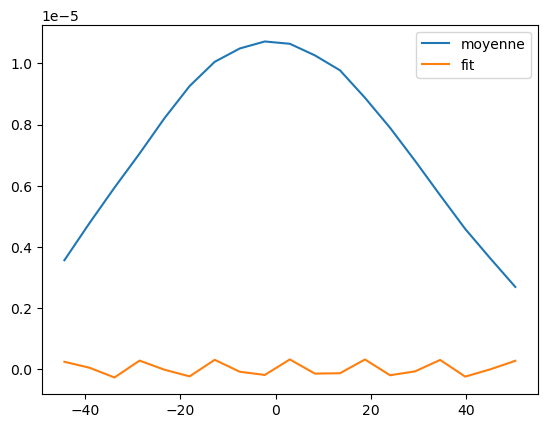

In [427]:
# Création du modèle avec lmfit
model = Model(cosine_func)

# Définition des paramètres et de leurs valeurs initiales
params = model.make_params(A=1, B=1, C=0)

# Ajustement de la courbe aux données
result = model.fit(M, params, x=X)

# Affichage des résultats de l'ajustement
print(result.fit_report())

# Tracé des données et du fit
plt.plot(X, M, label='moyenne')
plt.plot(X, result.best_fit, label='fit')
plt.legend()
plt.show()

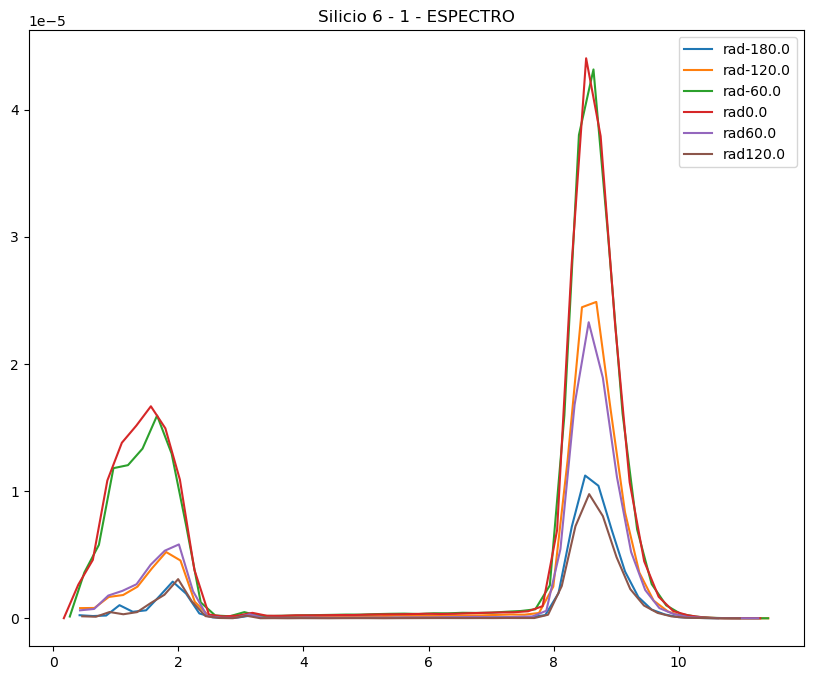

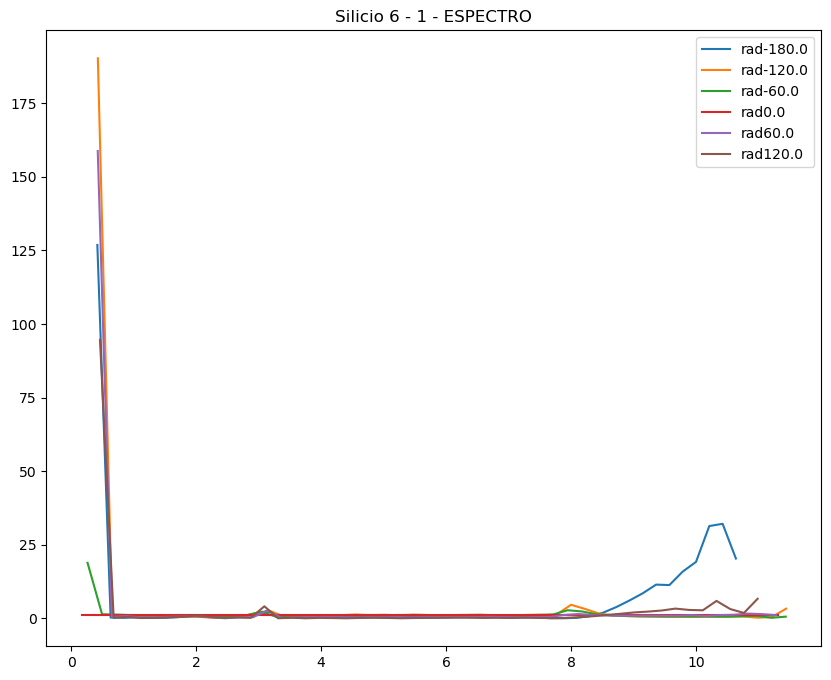

In [428]:
b= 50
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_61.plot_distribution_1D('log(E0/E)', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 1 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_61.plot_distribution_1D_ref('log(E0/E)', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 1 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()

In [429]:
track_61.save_source_file('tracks3_61.h5')

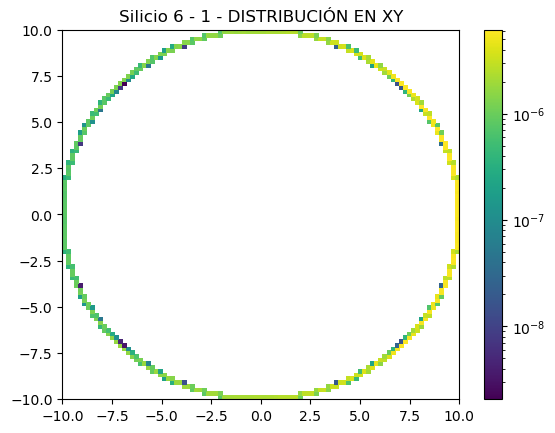

In [430]:
track_61 = SurfaceSourceFile('tracks3_61.h5')
track_61.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 1 - DISTRIBUCIÓN EN XY')
plt.show()

SILICIO 6 - 2

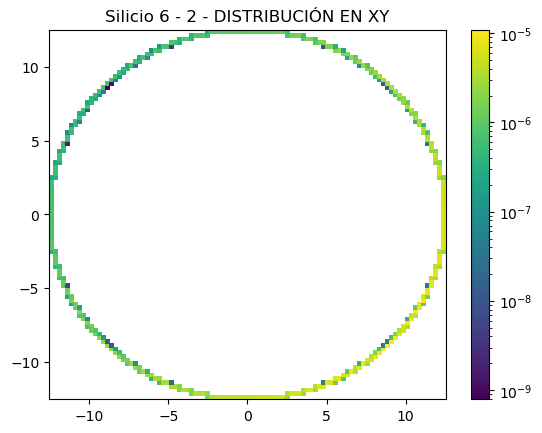

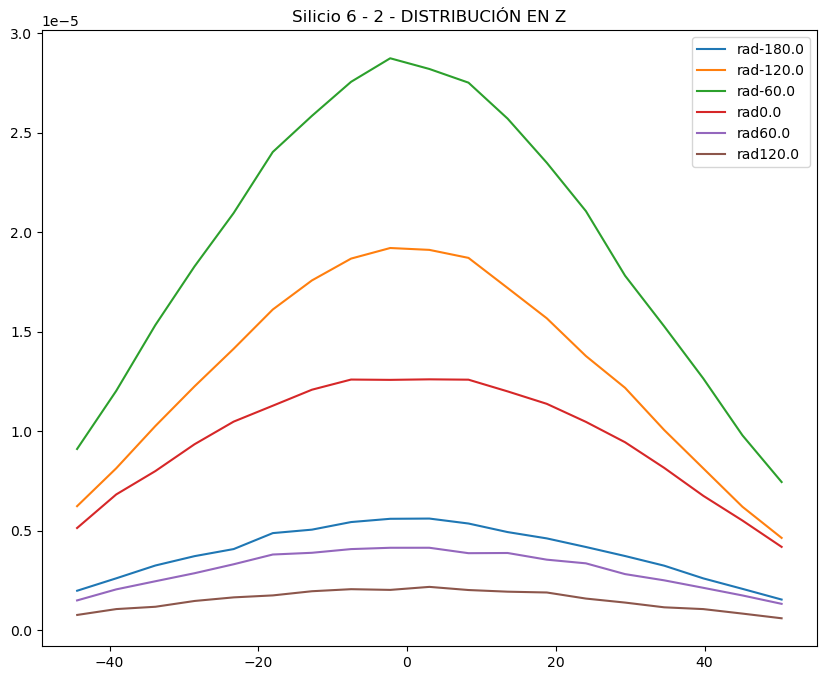

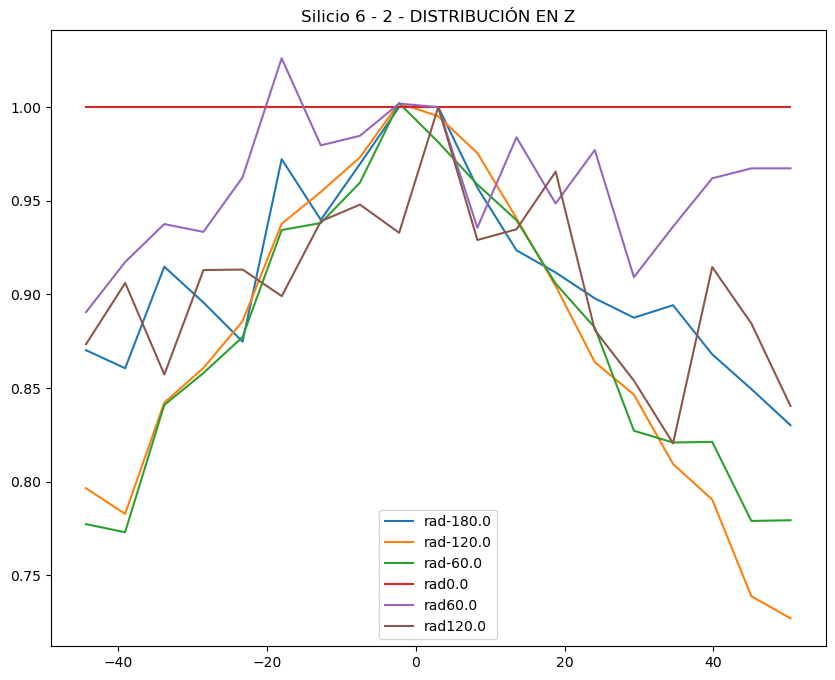

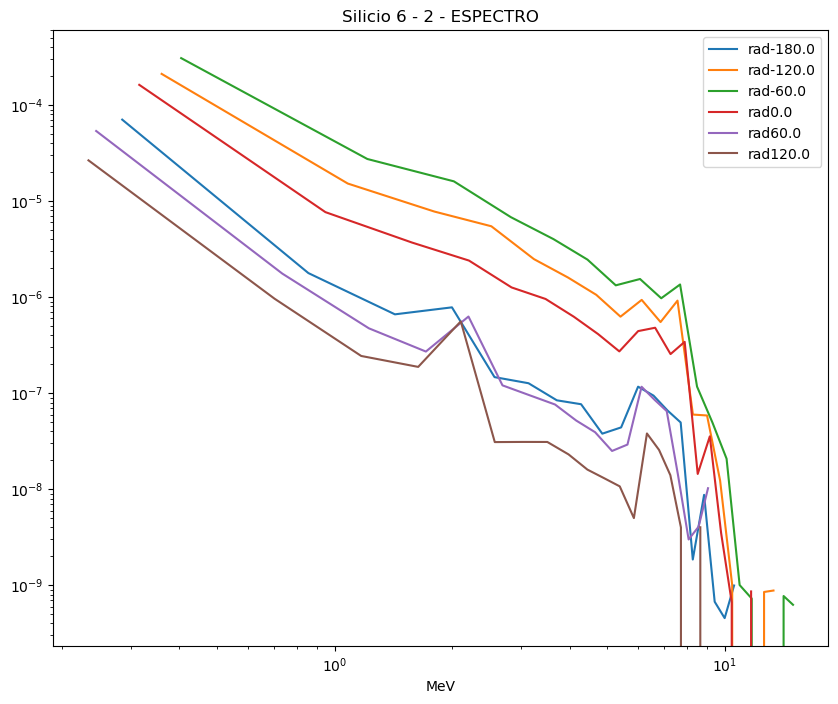

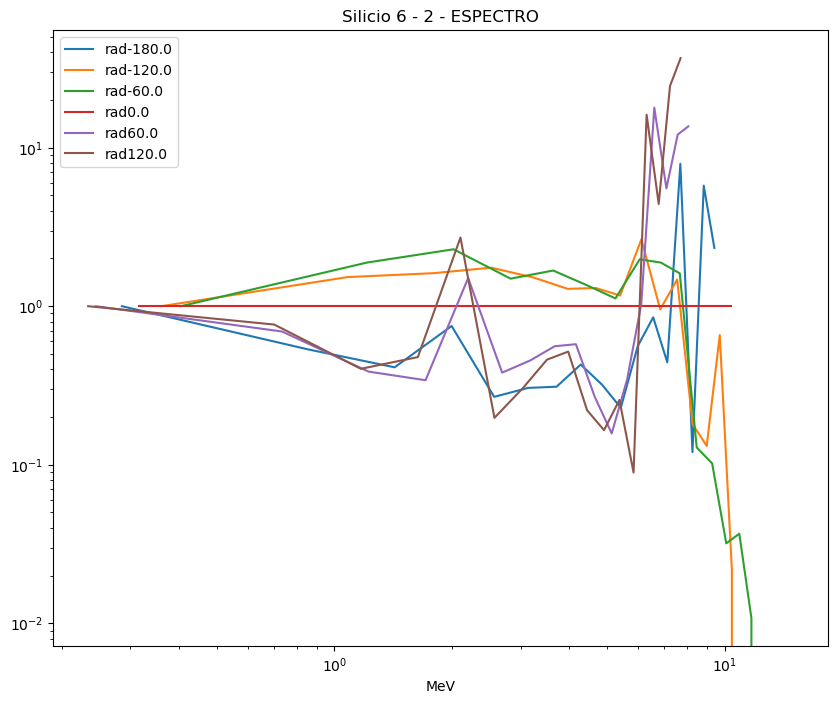

In [431]:
track_62 = SurfaceSourceFile('tracks3.mcpl', translation=[58,-52,3],domain={'x':[-80,-30], 'y':[30,80]}, set_domain_first=True)
track_62.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 2 - DISTRIBUCIÓN EN XY')
plt.show()
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_62.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 2 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_62.plot_distribution_1D_ref('z', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 2 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_62.plot_distribution_1D('E', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 2 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_62.plot_distribution_1D_ref('E', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 2 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

0     0.000004
1     0.000005
2     0.000007
3     0.000008
4     0.000009
5     0.000010
6     0.000011
7     0.000012
8     0.000012
9     0.000012
10    0.000012
11    0.000011
12    0.000010
13    0.000009
14    0.000008
15    0.000007
16    0.000006
17    0.000004
18    0.000003
Name: mean, dtype: float64


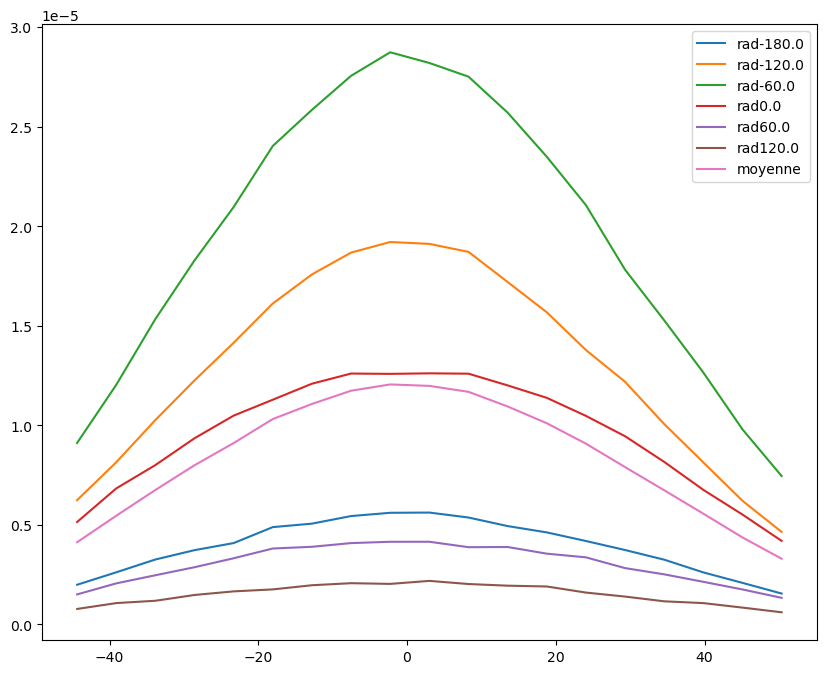

In [432]:
X=track_62.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['z']
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8))
M=track_62.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['mean']
for i,item in enumerate(grados):
    if(i < a-1):
        track_62.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
        if(i+1 < a-1):
            M+=track_62.get_distribution_1D('z', b, filters={'theta':[grados[i+1],grados[i+2]]})[0]['mean']
M=M/(a-1)
print(M)
plt.plot(X,M, label='moyenne')
#plt.plot(X,1.1e-5*np.cos((X/100)*np.pi), label='fit')
plt.legend()
plt.show()

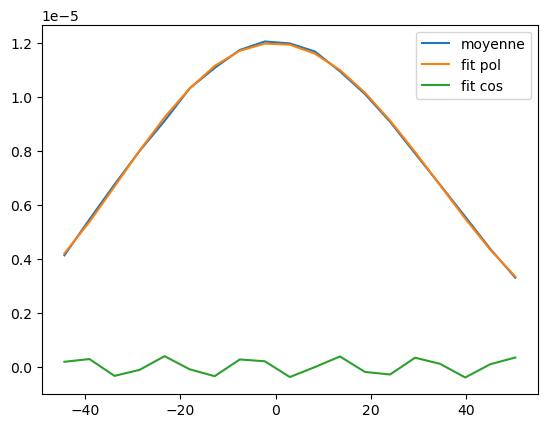

In [433]:
# Définition  des fonction
def polynomial_func(x, *coefficients):
    return np.polyval(coefficients, x)

def cosine_func(x, A,B):
    return A*np.cos((x/B)*np.pi)

# Ajustement de la courbe aux données
degree = 5  # Degré du polynôme
coeff_init = np.zeros(degree + 1)  # parametres 
params_pol, _ = curve_fit(polynomial_func, X, M, p0=coeff_init)
params_cos, _ = curve_fit(cosine_func, X, M)

# Tracé des données et du fit
plt.plot(X, M, label='moyenne')
plt.plot(X, polynomial_func(X, *params_pol), label='fit pol')
plt.plot(X, cosine_func(X, *params_cos), label='fit cos')

plt.legend()
plt.show()

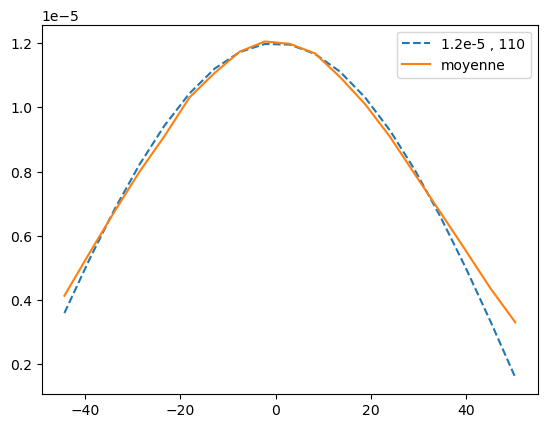

In [434]:
plt.plot(X, cosine_func(X,1.2e-5, 110 ), "--", label='1.2e-5 , 110')
plt.plot(X, M, label='moyenne')
plt.legend()
plt.show()

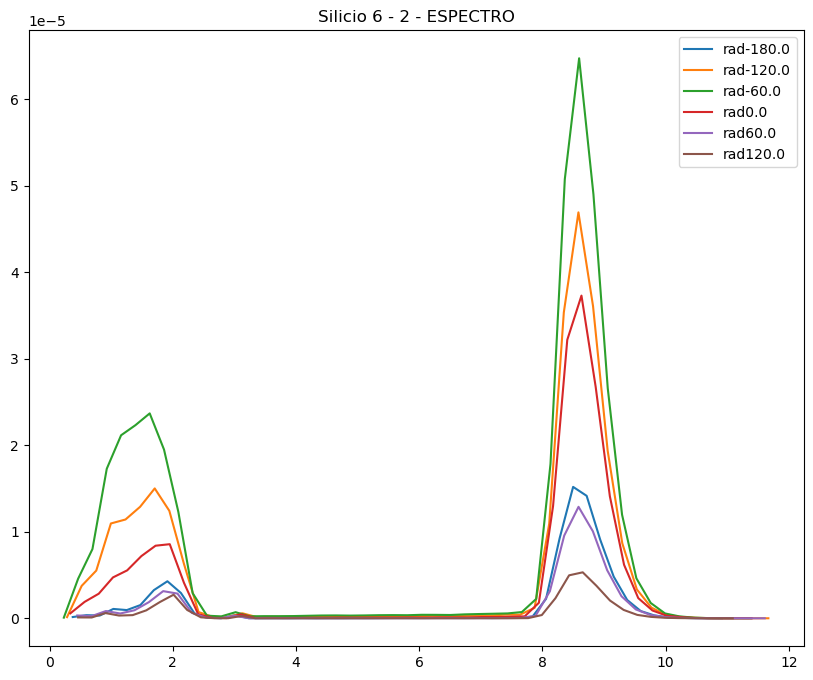

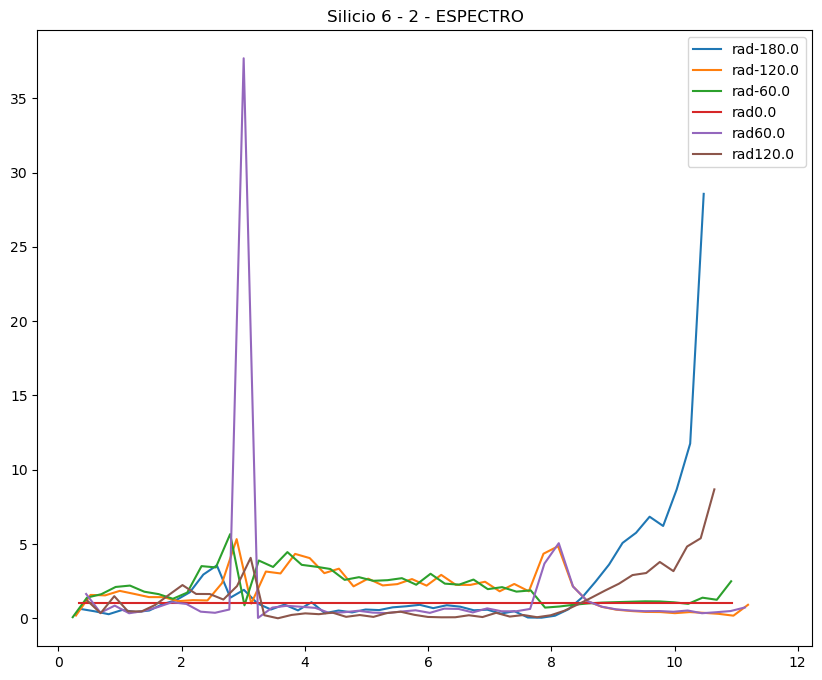

In [435]:
b= 50
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_62.plot_distribution_1D('log(E0/E)', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 2 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_62.plot_distribution_1D_ref('log(E0/E)', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 2 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()

In [436]:
track_62.save_source_file('tracks3_62.h5')

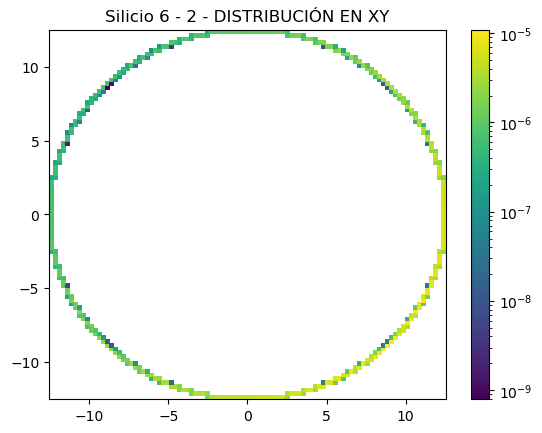

In [437]:
track_62 = SurfaceSourceFile('tracks3_62.h5')
track_62.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 2 - DISTRIBUCIÓN EN XY')
plt.show()

SILICIO 6 - 3

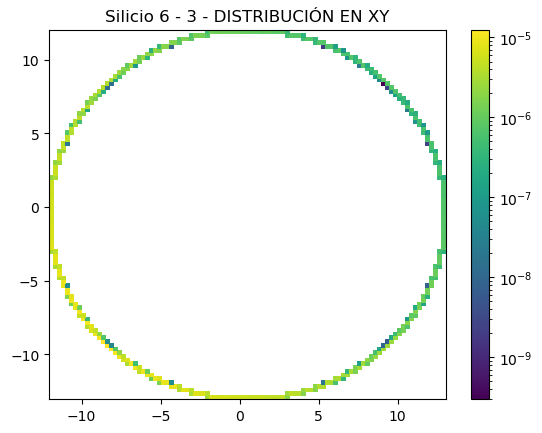

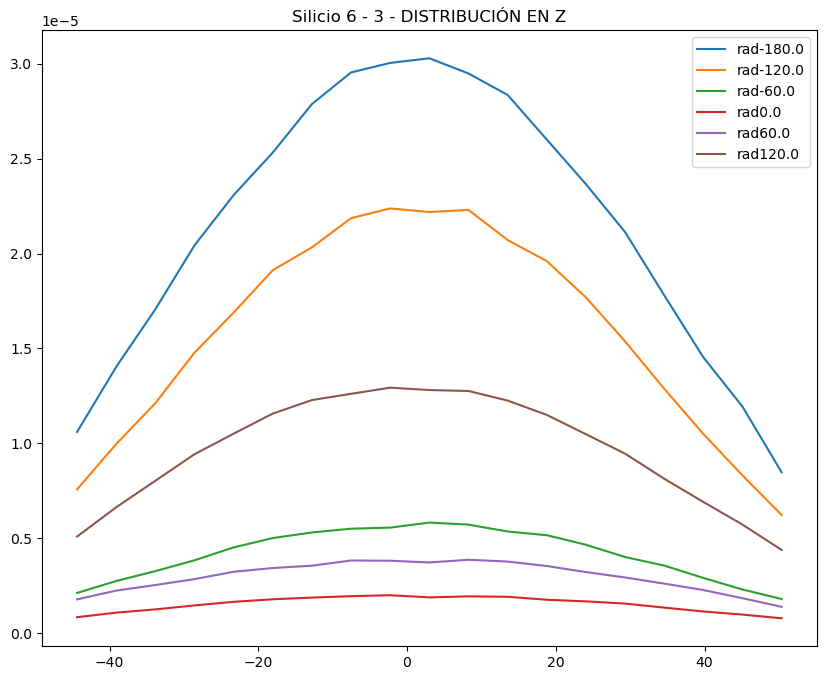

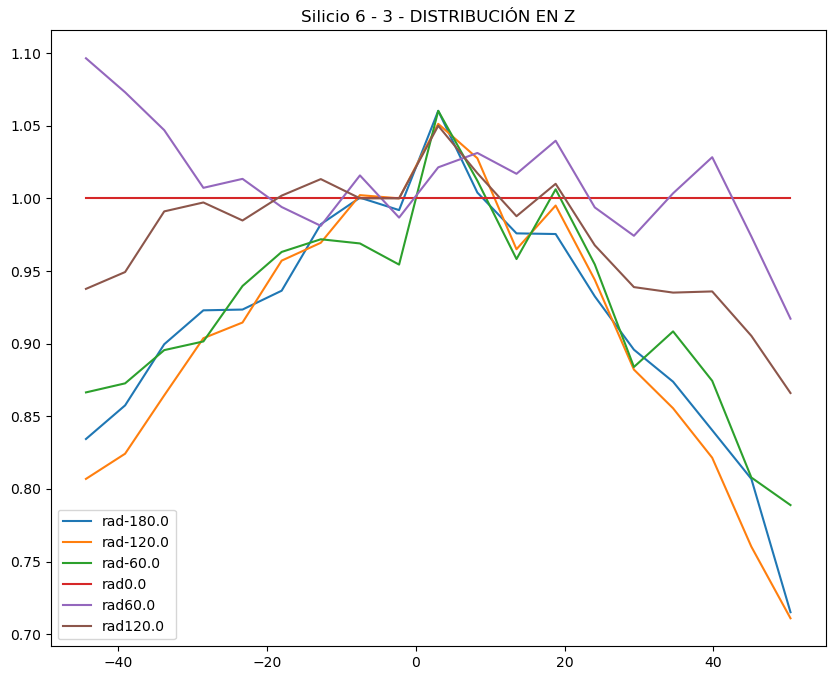

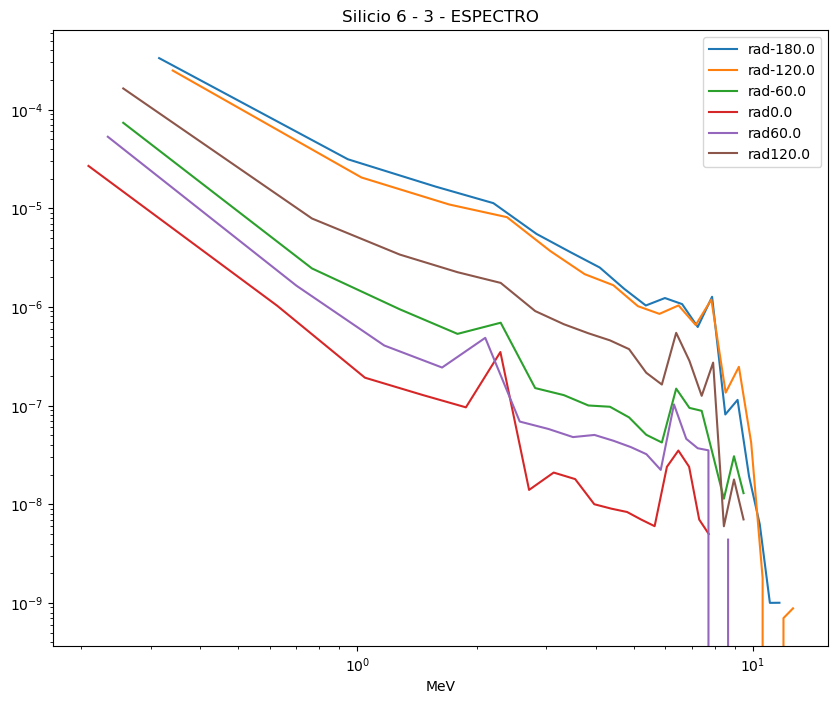

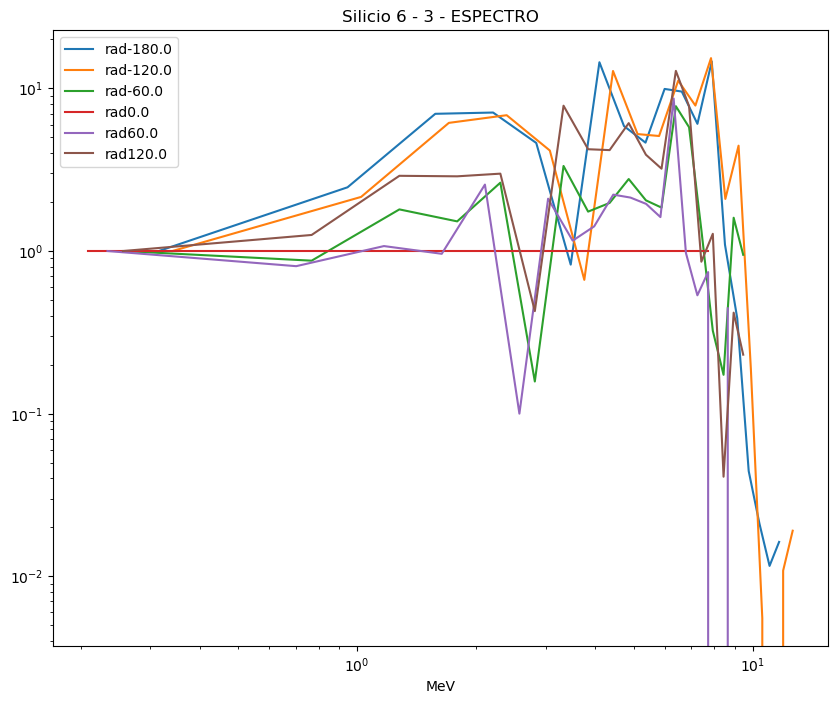

In [438]:
track_63 = SurfaceSourceFile('tracks3.mcpl', translation=[-51,-54,3],domain={'x':[30,70], 'y':[30,70]}, set_domain_first=True)
track_63.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 3 - DISTRIBUCIÓN EN XY')
plt.show()
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_63.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 3 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_63.plot_distribution_1D_ref('z', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 3 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_63.plot_distribution_1D('E', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 3 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_63.plot_distribution_1D_ref('E', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 3 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

0     0.000005
1     0.000006
2     0.000007
3     0.000009
4     0.000010
5     0.000011
6     0.000012
7     0.000013
8     0.000013
9     0.000013
10    0.000013
11    0.000012
12    0.000011
13    0.000010
14    0.000009
15    0.000008
16    0.000006
17    0.000005
18    0.000004
Name: mean, dtype: float64


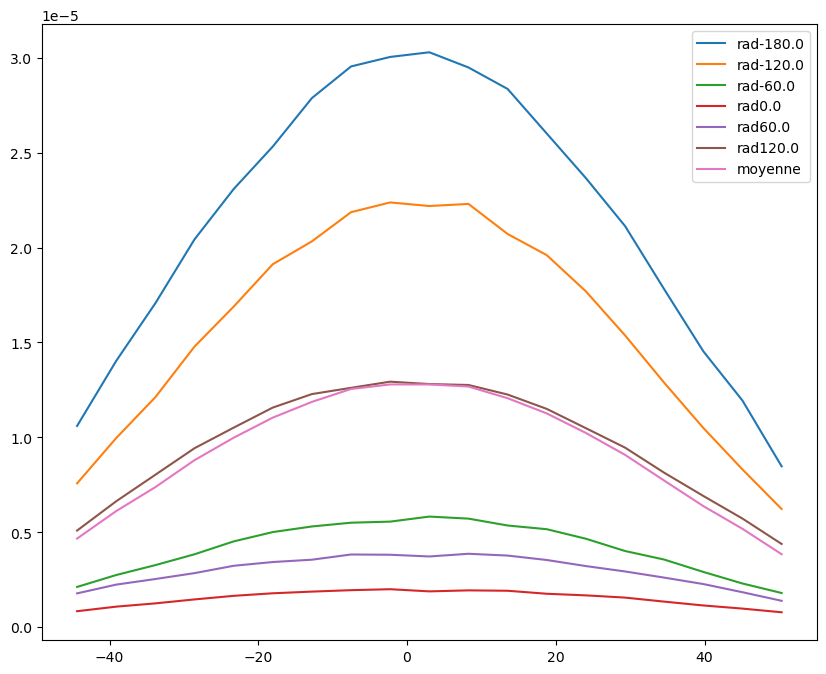

In [439]:
X=track_63.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['z']
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8))
M=track_63.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['mean']
for i,item in enumerate(grados):
    if(i < a-1):
        track_63.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
        if(i+1 < a-1):
            M+=track_63.get_distribution_1D('z', b, filters={'theta':[grados[i+1],grados[i+2]]})[0]['mean']
M=M/(a-1)
print(M)
plt.plot(X,M, label='moyenne')
#plt.plot(X,1.1e-5*np.cos((X/100)*np.pi), label='fit')
plt.legend()
plt.show()

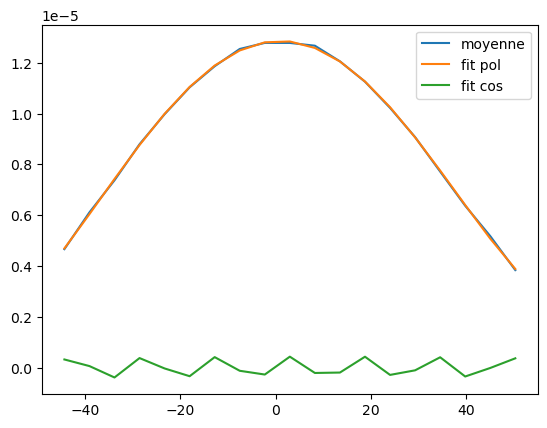

In [440]:
# Définition  des fonction
def polynomial_func(x, *coefficients):
    return np.polyval(coefficients, x)

def cosine_func(x, A,B):
    return A*np.cos((x/B)*np.pi)

# Ajustement de la courbe aux données
degree = 5  # Degré du polynôme
coeff_init = np.zeros(degree + 1)  # parametres 
params_pol, _ = curve_fit(polynomial_func, X, M, p0=coeff_init)
params_cos, _ = curve_fit(cosine_func, X, M)

# Tracé des données et du fit
plt.plot(X, M, label='moyenne')
plt.plot(X, polynomial_func(X, *params_pol), label='fit pol')
plt.plot(X, cosine_func(X, *params_cos), label='fit cos')

plt.legend()
plt.show()

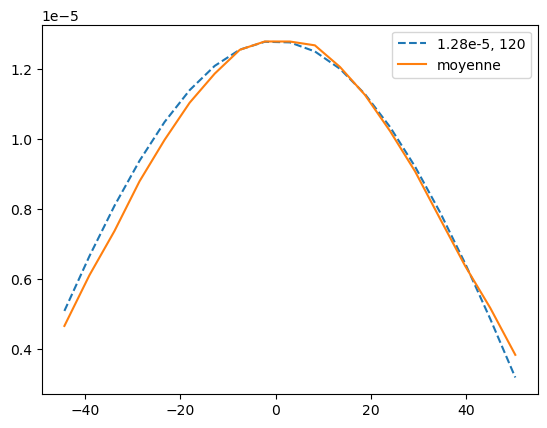

In [441]:
plt.plot(X, cosine_func(X,1.28e-5, 120 ), "--", label='1.28e-5, 120')
plt.plot(X, M, label='moyenne')
plt.legend()
plt.show()

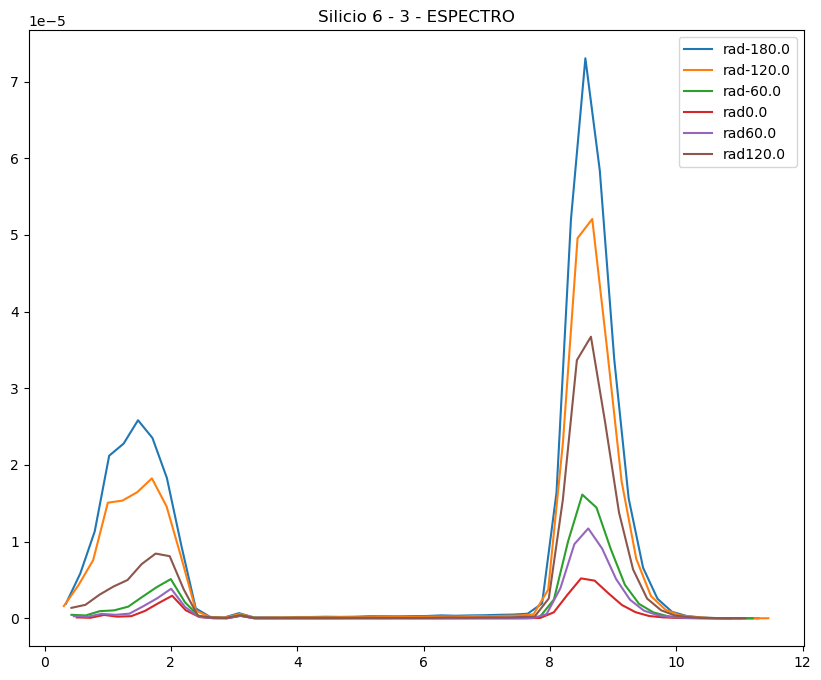

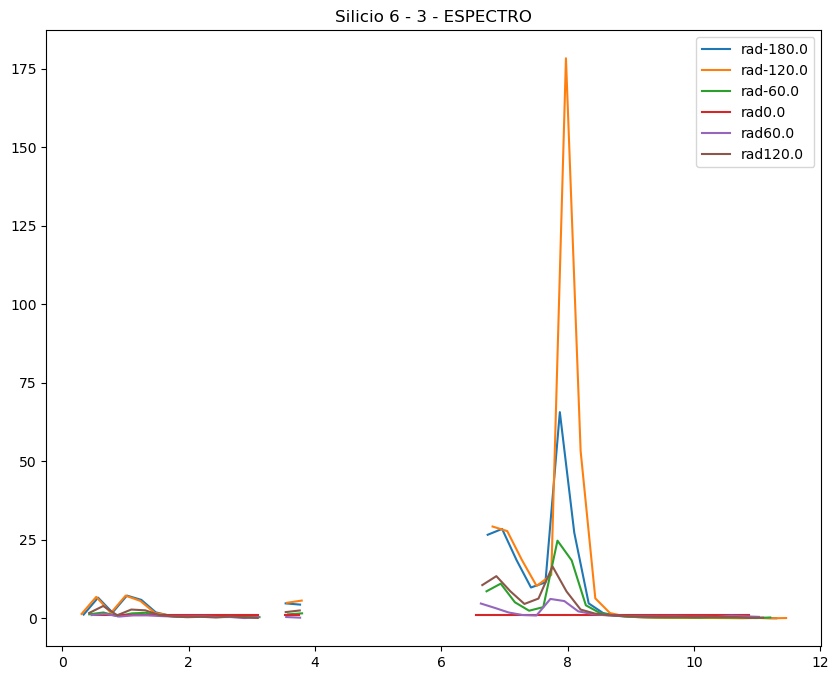

In [442]:
b= 50
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_63.plot_distribution_1D('log(E0/E)', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 3 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_63.plot_distribution_1D_ref('log(E0/E)', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 3 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()

In [443]:
track_63.save_source_file('tracks3_63.h5')

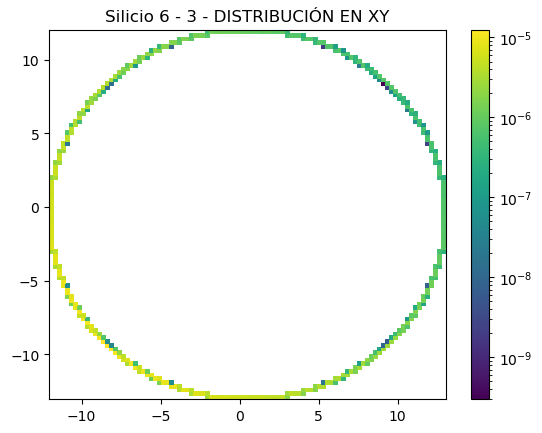

In [444]:
track_63 = SurfaceSourceFile('tracks3_63.h5')
track_63.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 3 - DISTRIBUCIÓN EN XY')
plt.show()

SILICIO 6 - 4

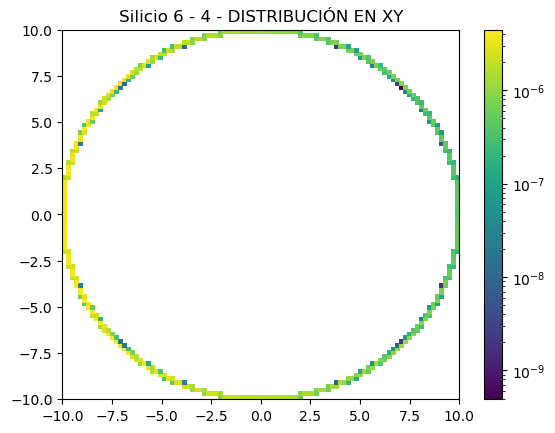

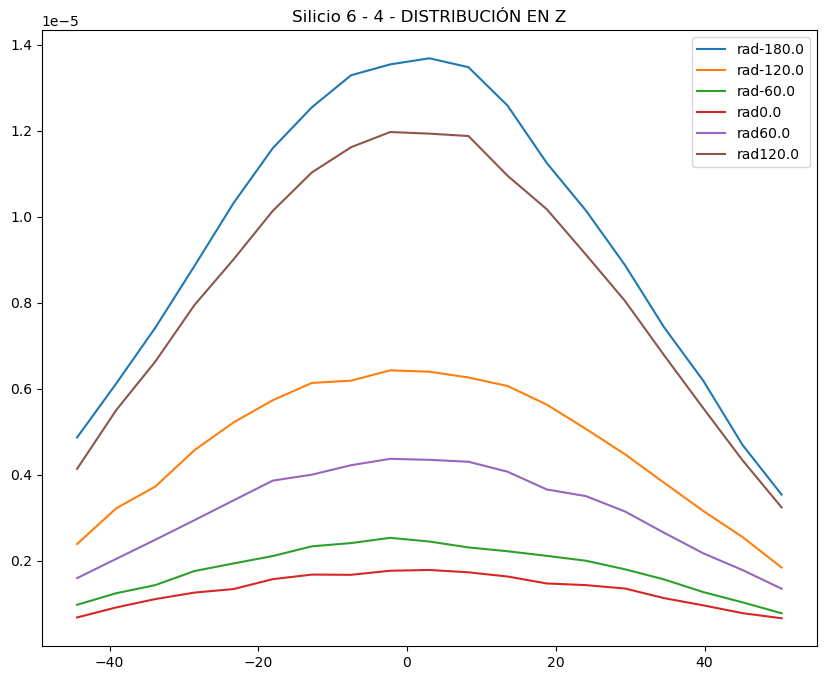

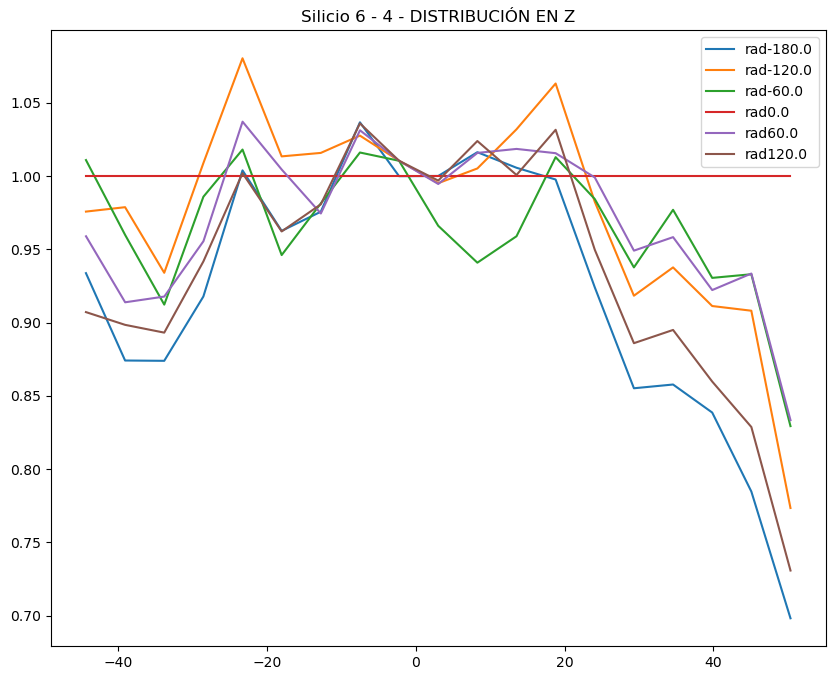

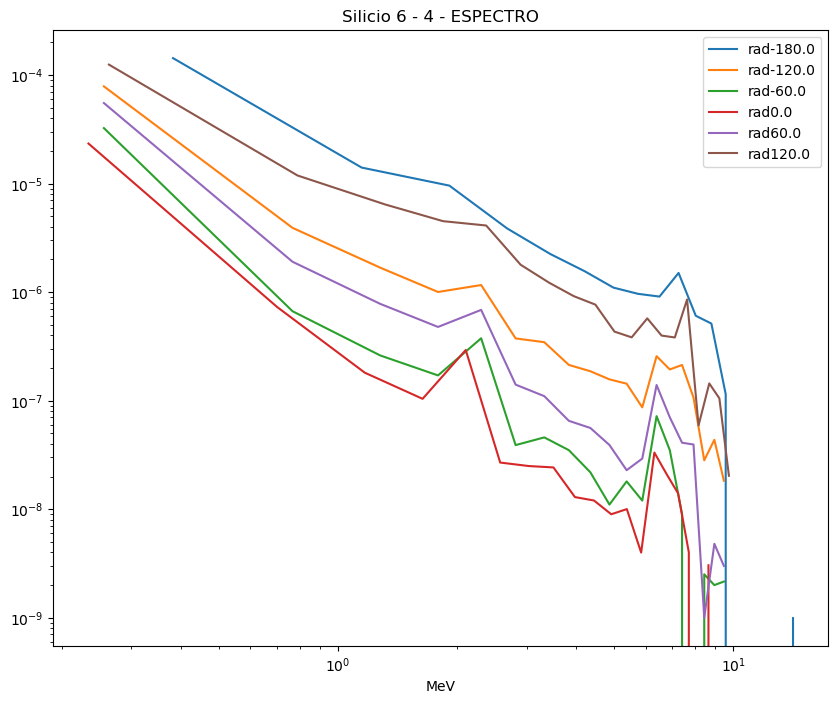

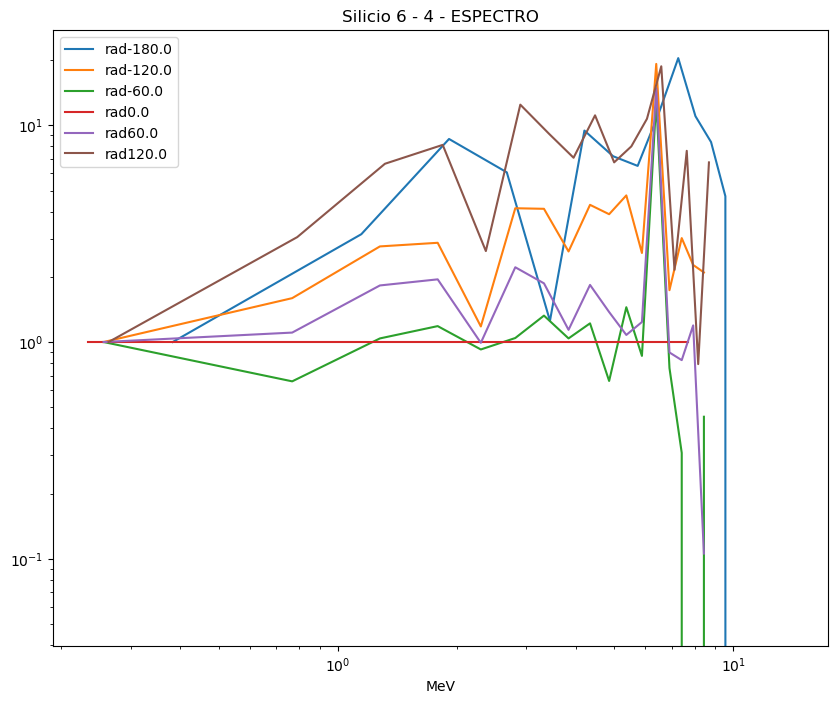

In [445]:
track_64 = SurfaceSourceFile('tracks3.mcpl', translation=[-75,-12.5,3],domain={'x':[60,100], 'y':[-10,30]}, set_domain_first=True)
track_64.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 4 - DISTRIBUCIÓN EN XY')
plt.show()
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_64.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 4 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_64.plot_distribution_1D_ref('z', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 4 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_64.plot_distribution_1D('E', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 4 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_64.plot_distribution_1D_ref('E', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 4 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

0     0.000002
1     0.000003
2     0.000004
3     0.000005
4     0.000005
5     0.000006
6     0.000006
7     0.000007
8     0.000007
9     0.000007
10    0.000007
11    0.000006
12    0.000006
13    0.000005
14    0.000005
15    0.000004
16    0.000003
17    0.000003
18    0.000002
Name: mean, dtype: float64


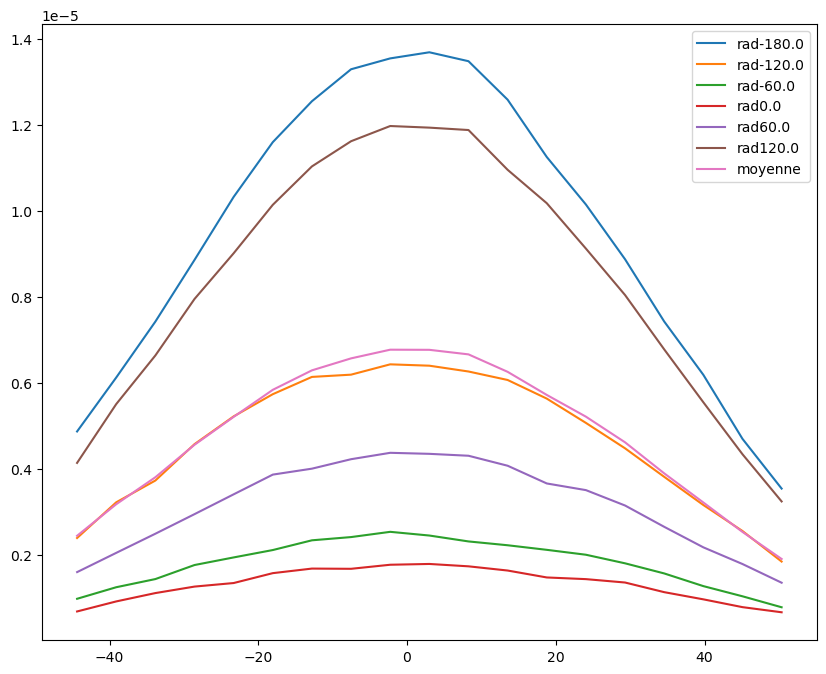

In [446]:
X=track_64.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['z']
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8))
M=track_64.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['mean']
for i,item in enumerate(grados):
    if(i < a-1):
        track_64.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
        if(i+1 < a-1):
            M+=track_64.get_distribution_1D('z', b, filters={'theta':[grados[i+1],grados[i+2]]})[0]['mean']
M=M/(a-1)
print(M)
plt.plot(X,M, label='moyenne')
#plt.plot(X,1.1e-5*np.cos((X/100)*np.pi), label='fit')
plt.legend()
plt.show()

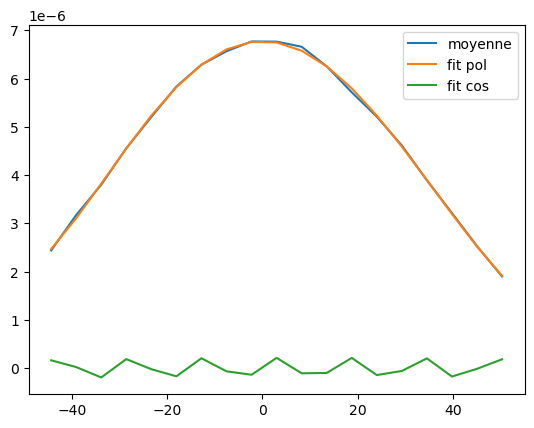

In [447]:
# Définition  des fonction
def polynomial_func(x, *coefficients):
    return np.polyval(coefficients, x)

def cosine_func(x, A,B):
    return A*np.cos((x/B)*np.pi)

# Ajustement de la courbe aux données
degree = 5  # Degré du polynôme
coeff_init = np.zeros(degree + 1)  # parametres 
params_pol, _ = curve_fit(polynomial_func, X, M, p0=coeff_init)
params_cos, _ = curve_fit(cosine_func, X, M)

# Tracé des données et du fit
plt.plot(X, M, label='moyenne')
plt.plot(X, polynomial_func(X, *params_pol), label='fit pol')
plt.plot(X, cosine_func(X, *params_cos), label='fit cos')

plt.legend()
plt.show()

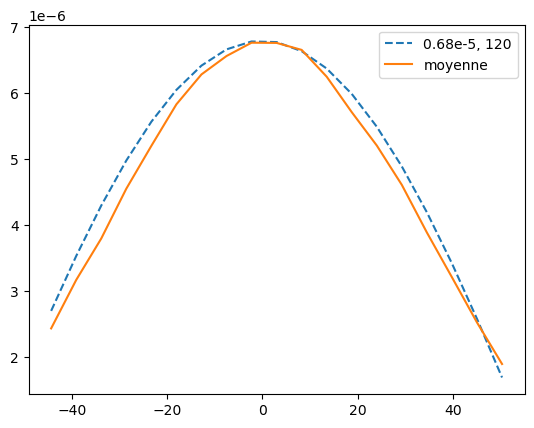

In [448]:
plt.plot(X, cosine_func(X,0.68e-5, 120 ), "--", label='0.68e-5, 120')
plt.plot(X, M, label='moyenne')
plt.legend()
plt.show()

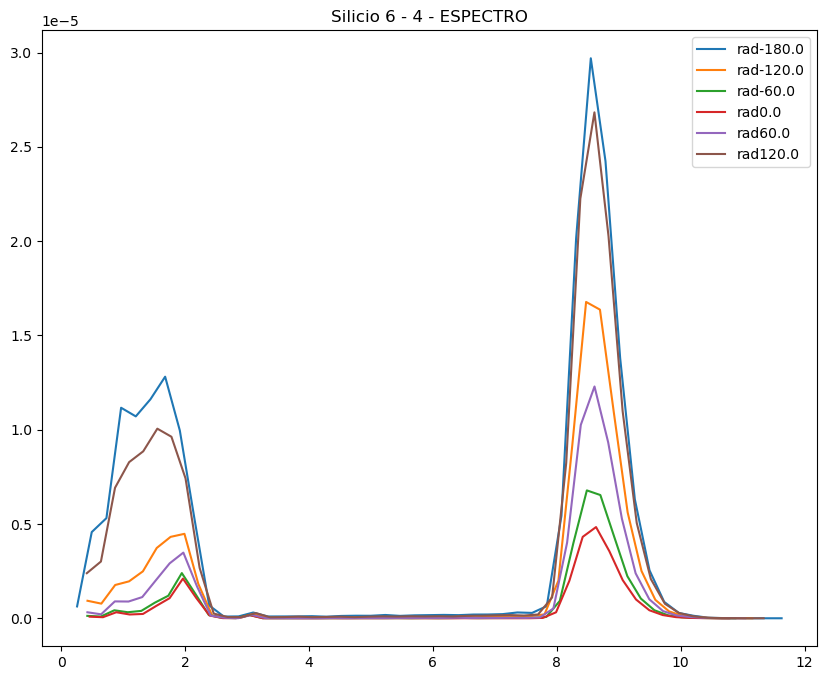

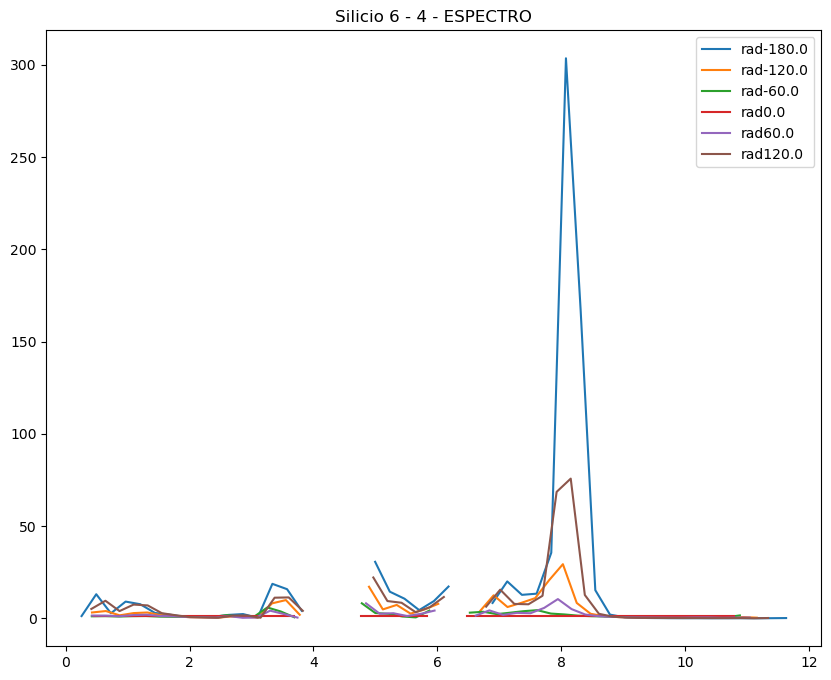

In [449]:
b= 50
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_64.plot_distribution_1D('log(E0/E)', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 4 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_64.plot_distribution_1D_ref('log(E0/E)', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 4 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()

In [450]:
track_64.save_source_file('tracks3_64.h5')

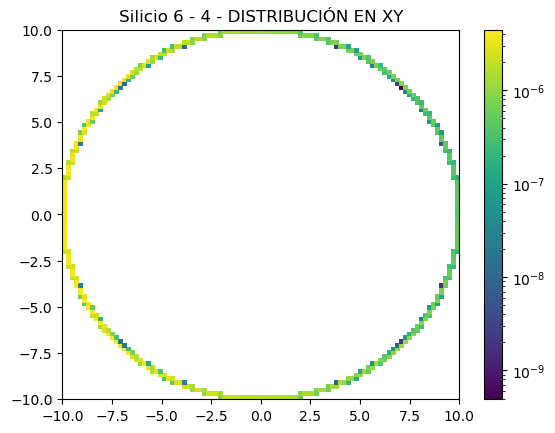

In [451]:
track_64 = SurfaceSourceFile('tracks3_64.h5')
track_64.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 4 - DISTRIBUCIÓN EN XY')
plt.show()

SILICIO 6 - 5

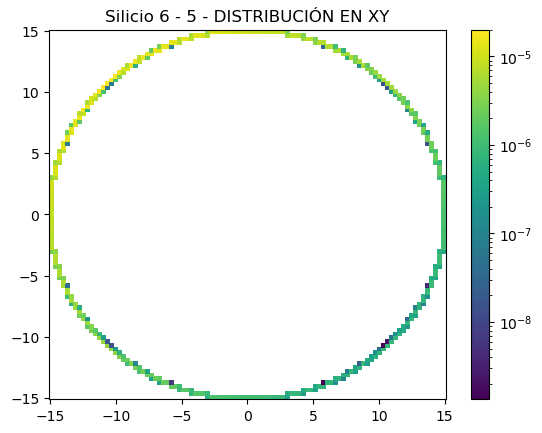

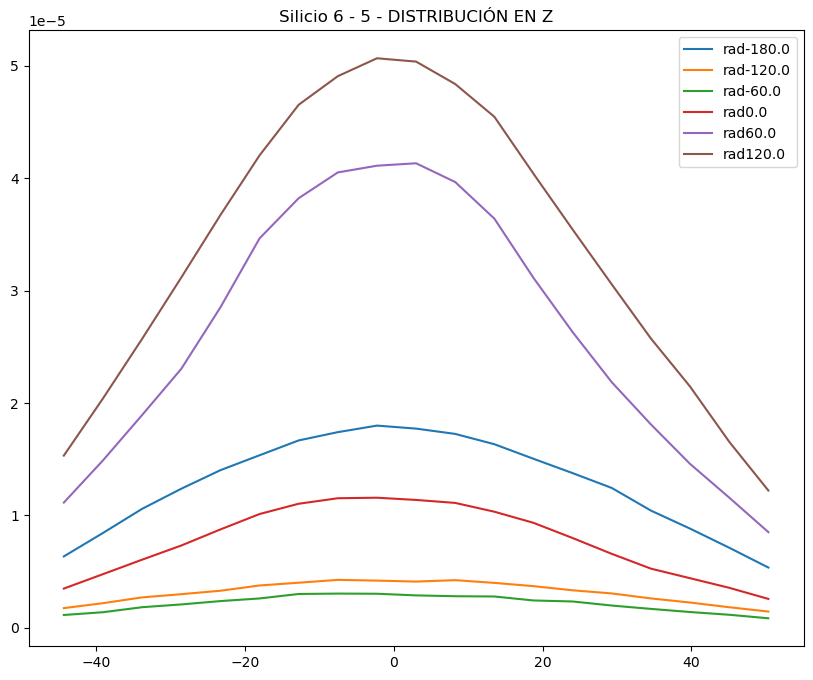

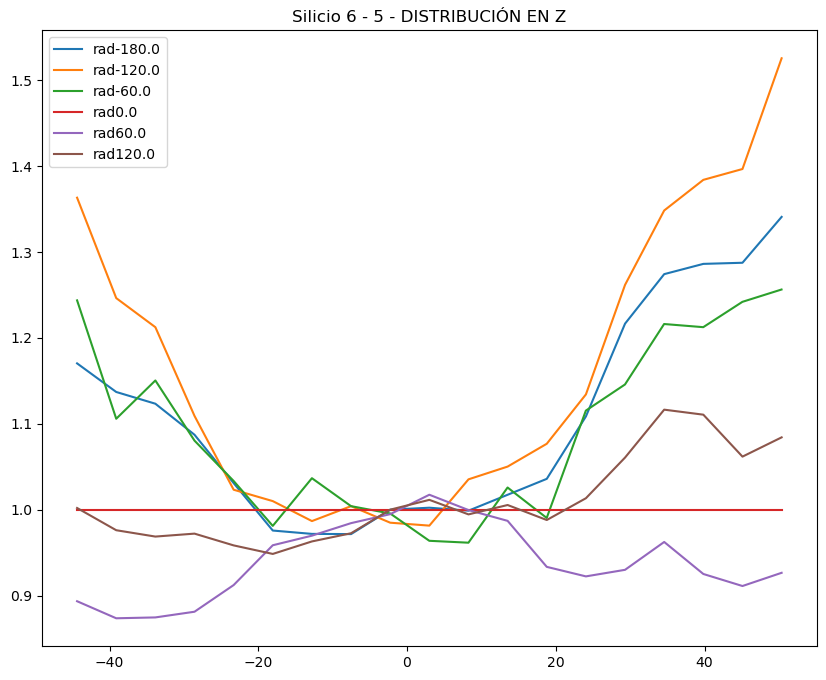

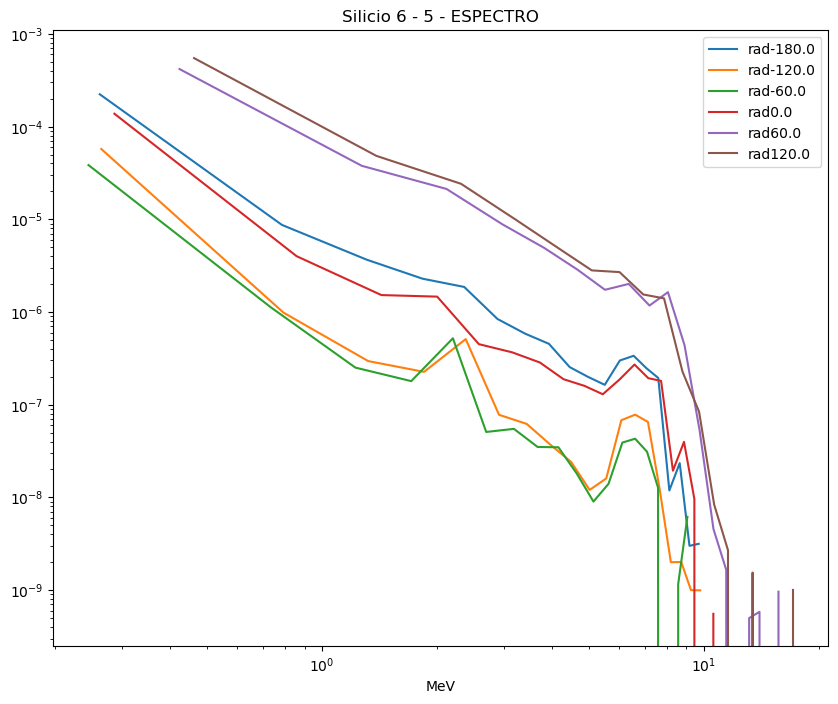

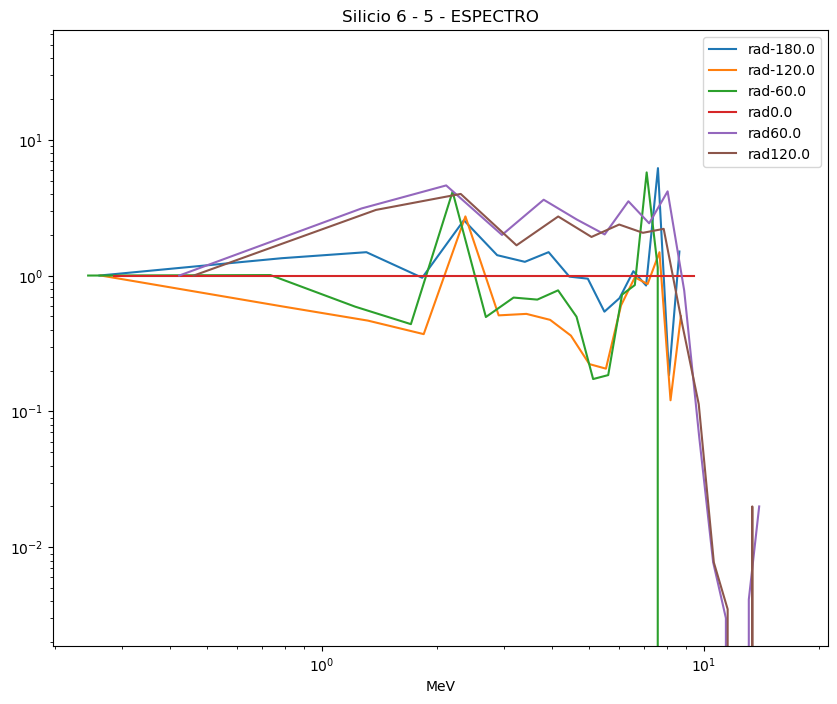

In [452]:
track_65 = SurfaceSourceFile('tracks3.mcpl', translation=[-47,56,3],domain={'x':[30,70], 'y':[-80,-40]}, set_domain_first=True)
track_65.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 5 - DISTRIBUCIÓN EN XY')
plt.show()
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_65.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 5 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_65.plot_distribution_1D_ref('z', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 5 - DISTRIBUCIÓN EN Z')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_65.plot_distribution_1D('E', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 5 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_65.plot_distribution_1D_ref('E', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 5 - ESPECTRO')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('MeV')
plt.legend()
plt.show()

0     0.000007
1     0.000009
2     0.000011
3     0.000013
4     0.000016
5     0.000018
6     0.000020
7     0.000021
8     0.000021
9     0.000021
10    0.000021
11    0.000019
12    0.000017
13    0.000015
14    0.000013
15    0.000011
16    0.000009
17    0.000007
18    0.000005
Name: mean, dtype: float64


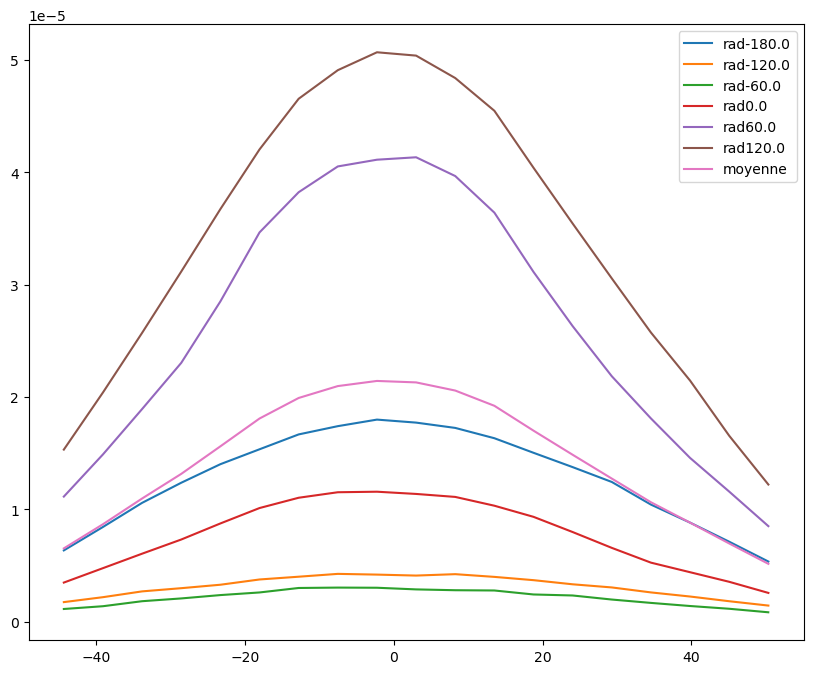

In [453]:
X=track_65.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['z']
a = 7
grados = np.linspace(-180,180,7)
b=20
plt.figure(figsize=(10,8))
M=track_65.get_distribution_1D('z', b, filters={'theta':[-180,-120]})[0]['mean']
for i,item in enumerate(grados):
    if(i < a-1):
        track_65.plot_distribution_1D('z', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
        if(i+1 < a-1):
            M+=track_65.get_distribution_1D('z', b, filters={'theta':[grados[i+1],grados[i+2]]})[0]['mean']
M=M/(a-1)
print(M)
plt.plot(X,M, label='moyenne')
#plt.plot(X,1.1e-5*np.cos((X/100)*np.pi), label='fit')
plt.legend()
plt.show()

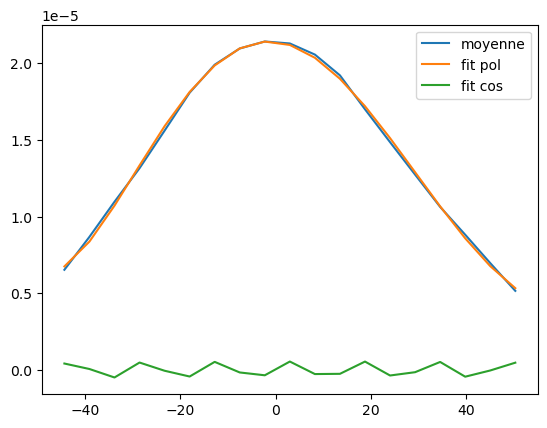

In [454]:
# Définition  des fonction
def polynomial_func(x, *coefficients):
    return np.polyval(coefficients, x)

def cosine_func(x, A,B):
    return A*np.cos((x/B)*np.pi)

# Ajustement de la courbe aux données
degree = 5  # Degré du polynôme
coeff_init = np.zeros(degree + 1)  # parametres 
params_pol, _ = curve_fit(polynomial_func, X, M, p0=coeff_init)
params_cos, _ = curve_fit(cosine_func, X, M)

# Tracé des données et du fit
plt.plot(X, M, label='moyenne')
plt.plot(X, polynomial_func(X, *params_pol), label='fit pol')
plt.plot(X, cosine_func(X, *params_cos), label='fit cos')

plt.legend()
plt.show()

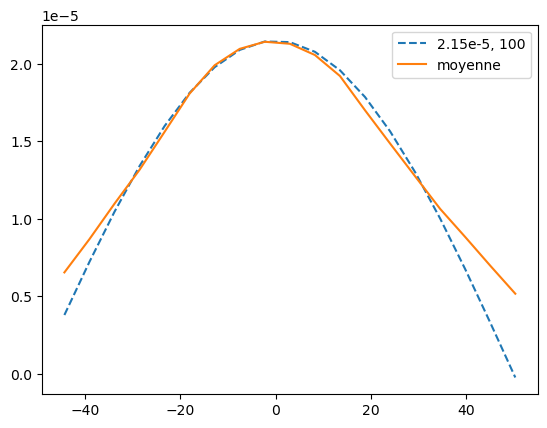

In [455]:
plt.plot(X, cosine_func(X,2.15e-5, 100 ), "--", label='2.15e-5, 100')
plt.plot(X, M, label='moyenne')
plt.legend()
plt.show()

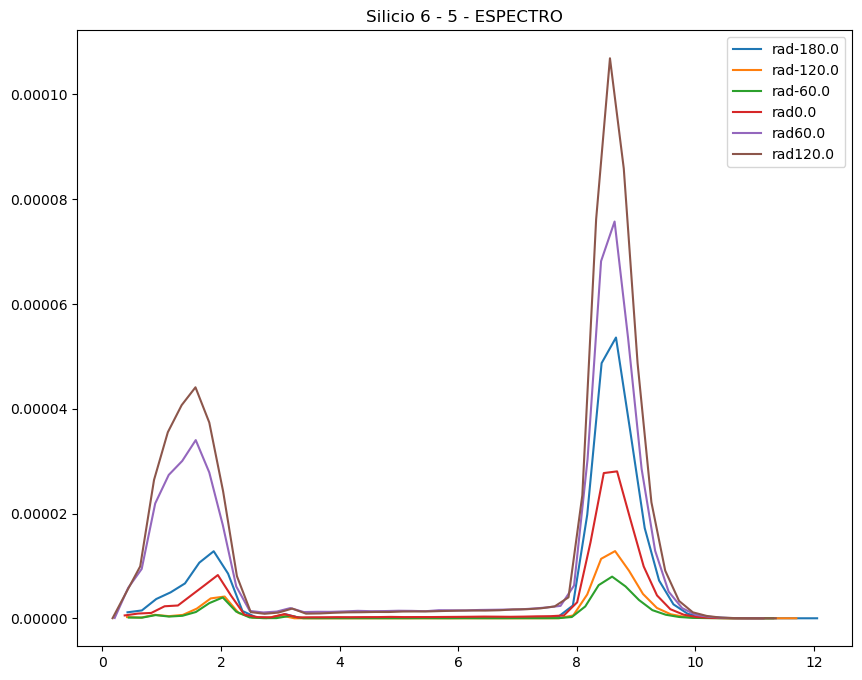

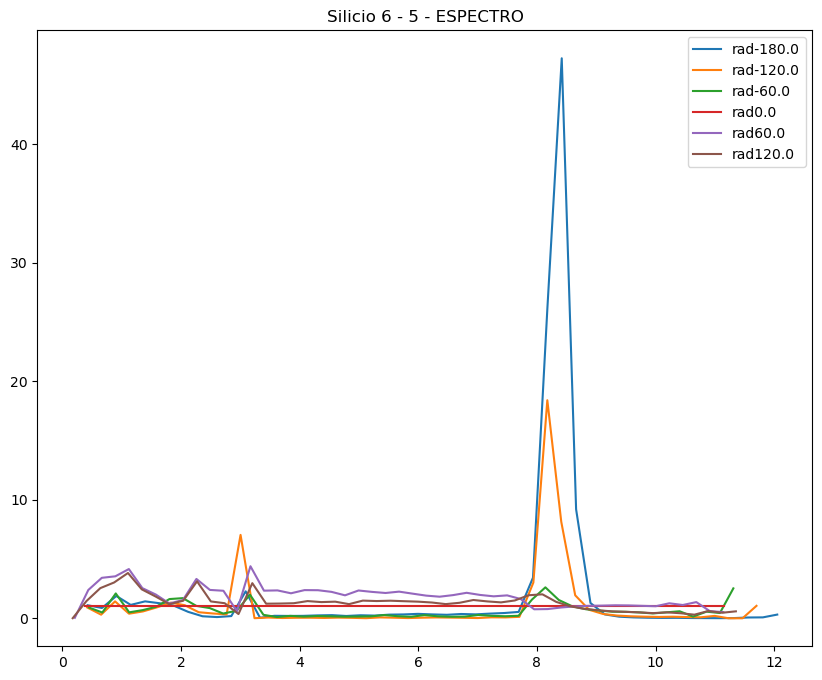

In [456]:
b= 50
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_65.plot_distribution_1D('log(E0/E)', b, filters={'theta':[grados[i],grados[i+1]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 5 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()
plt.figure(figsize=(10,8)) 
for i,item in enumerate(grados):
    if(i < a-1):
        track_65.plot_distribution_1D_ref('log(E0/E)', b, filters1={'theta':[grados[i],grados[i+1]]},filters2={'theta':[grados[3],grados[4]]},  label=f'rad{grados[i]}')
plt.title('Silicio 6 - 5 - ESPECTRO')
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('MeV')
plt.legend()
plt.show()

In [457]:
track_65.save_source_file('tracks3_65.h5')

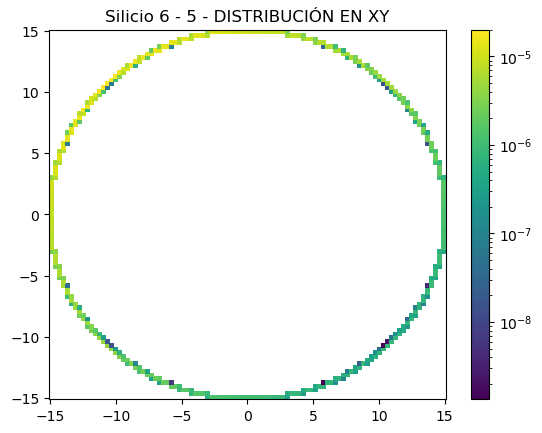

In [458]:
track_65 = SurfaceSourceFile('tracks3_65.h5')
track_65.plot_distribution_2D('x','y', norm = LogNorm())
plt.title('Silicio 6 - 5 - DISTRIBUCIÓN EN XY')
plt.show()